#Databricks ecosystem

In this presentation with some code examples we are going to put Databricks ecosystem and especially Delta Lake concept under magnifying glass.

Databricks is a **unified analytics platform** designed to help organizations **process, analyze, and visualize** large volumes of data. It was created by the team that developed Apache Spark, an open-source big data processing engine. The Databricks ecosystem consists of several components that work together to provide a comprehensive data analytics solution.

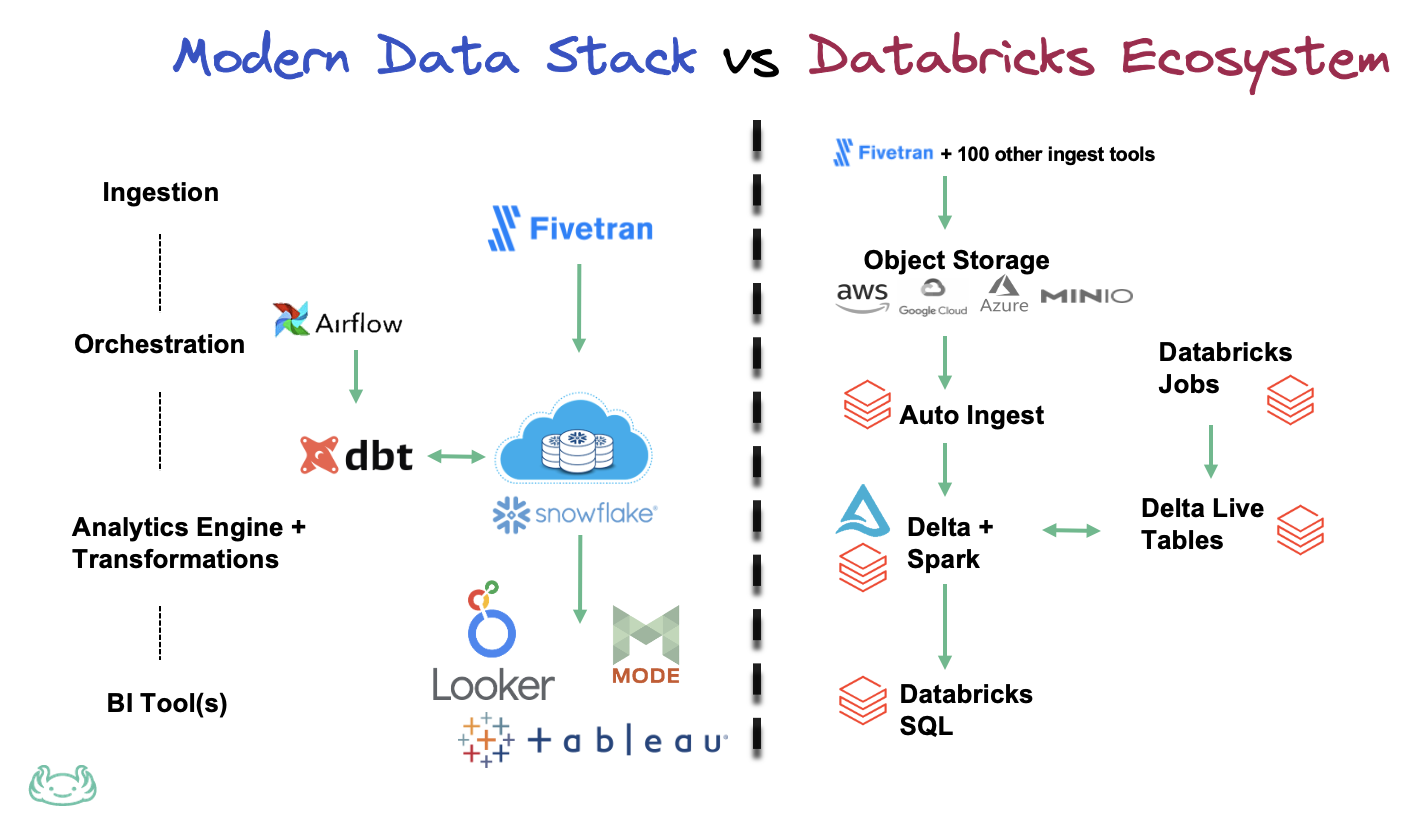

Credits for the picture go to [lakefs.io](https://lakefs.io/blog/thoughts-on-the-future-of-the-databricks-ecosystem/).

The one, big advantage of this ecosystem is that the whole data flow from the beginning to an end is contained almost entirely within **one** ecosystem. The system allows to minimize latency, maximize throughput and of course optimize data storage, and analysis (see the picture above for comparison with the datastack outside of Databricks).


##Databrick Workspace

Databricks Workspace is a **web-based environment** that enables data scientists and analysts to collaborate, share code, and manage their projects. It includes a notebook interface, which allows users to write code in multiple languages, including **Python, R, Scala,** and **SQL**. Notebooks can be shared with other users, enabling collaboration and knowledge sharing. It's entirely cloud based with all configuration performed within cloud settings. 

Primarily Databricks was available exclusively in Azure Cloud, nowadays it's accessible also in AWS and Google Cloud Platform.

On the picture ([source](https://docs.databricks.com/getting-started/quick-start.html)) below you can glance at Landing page of the Workspace.

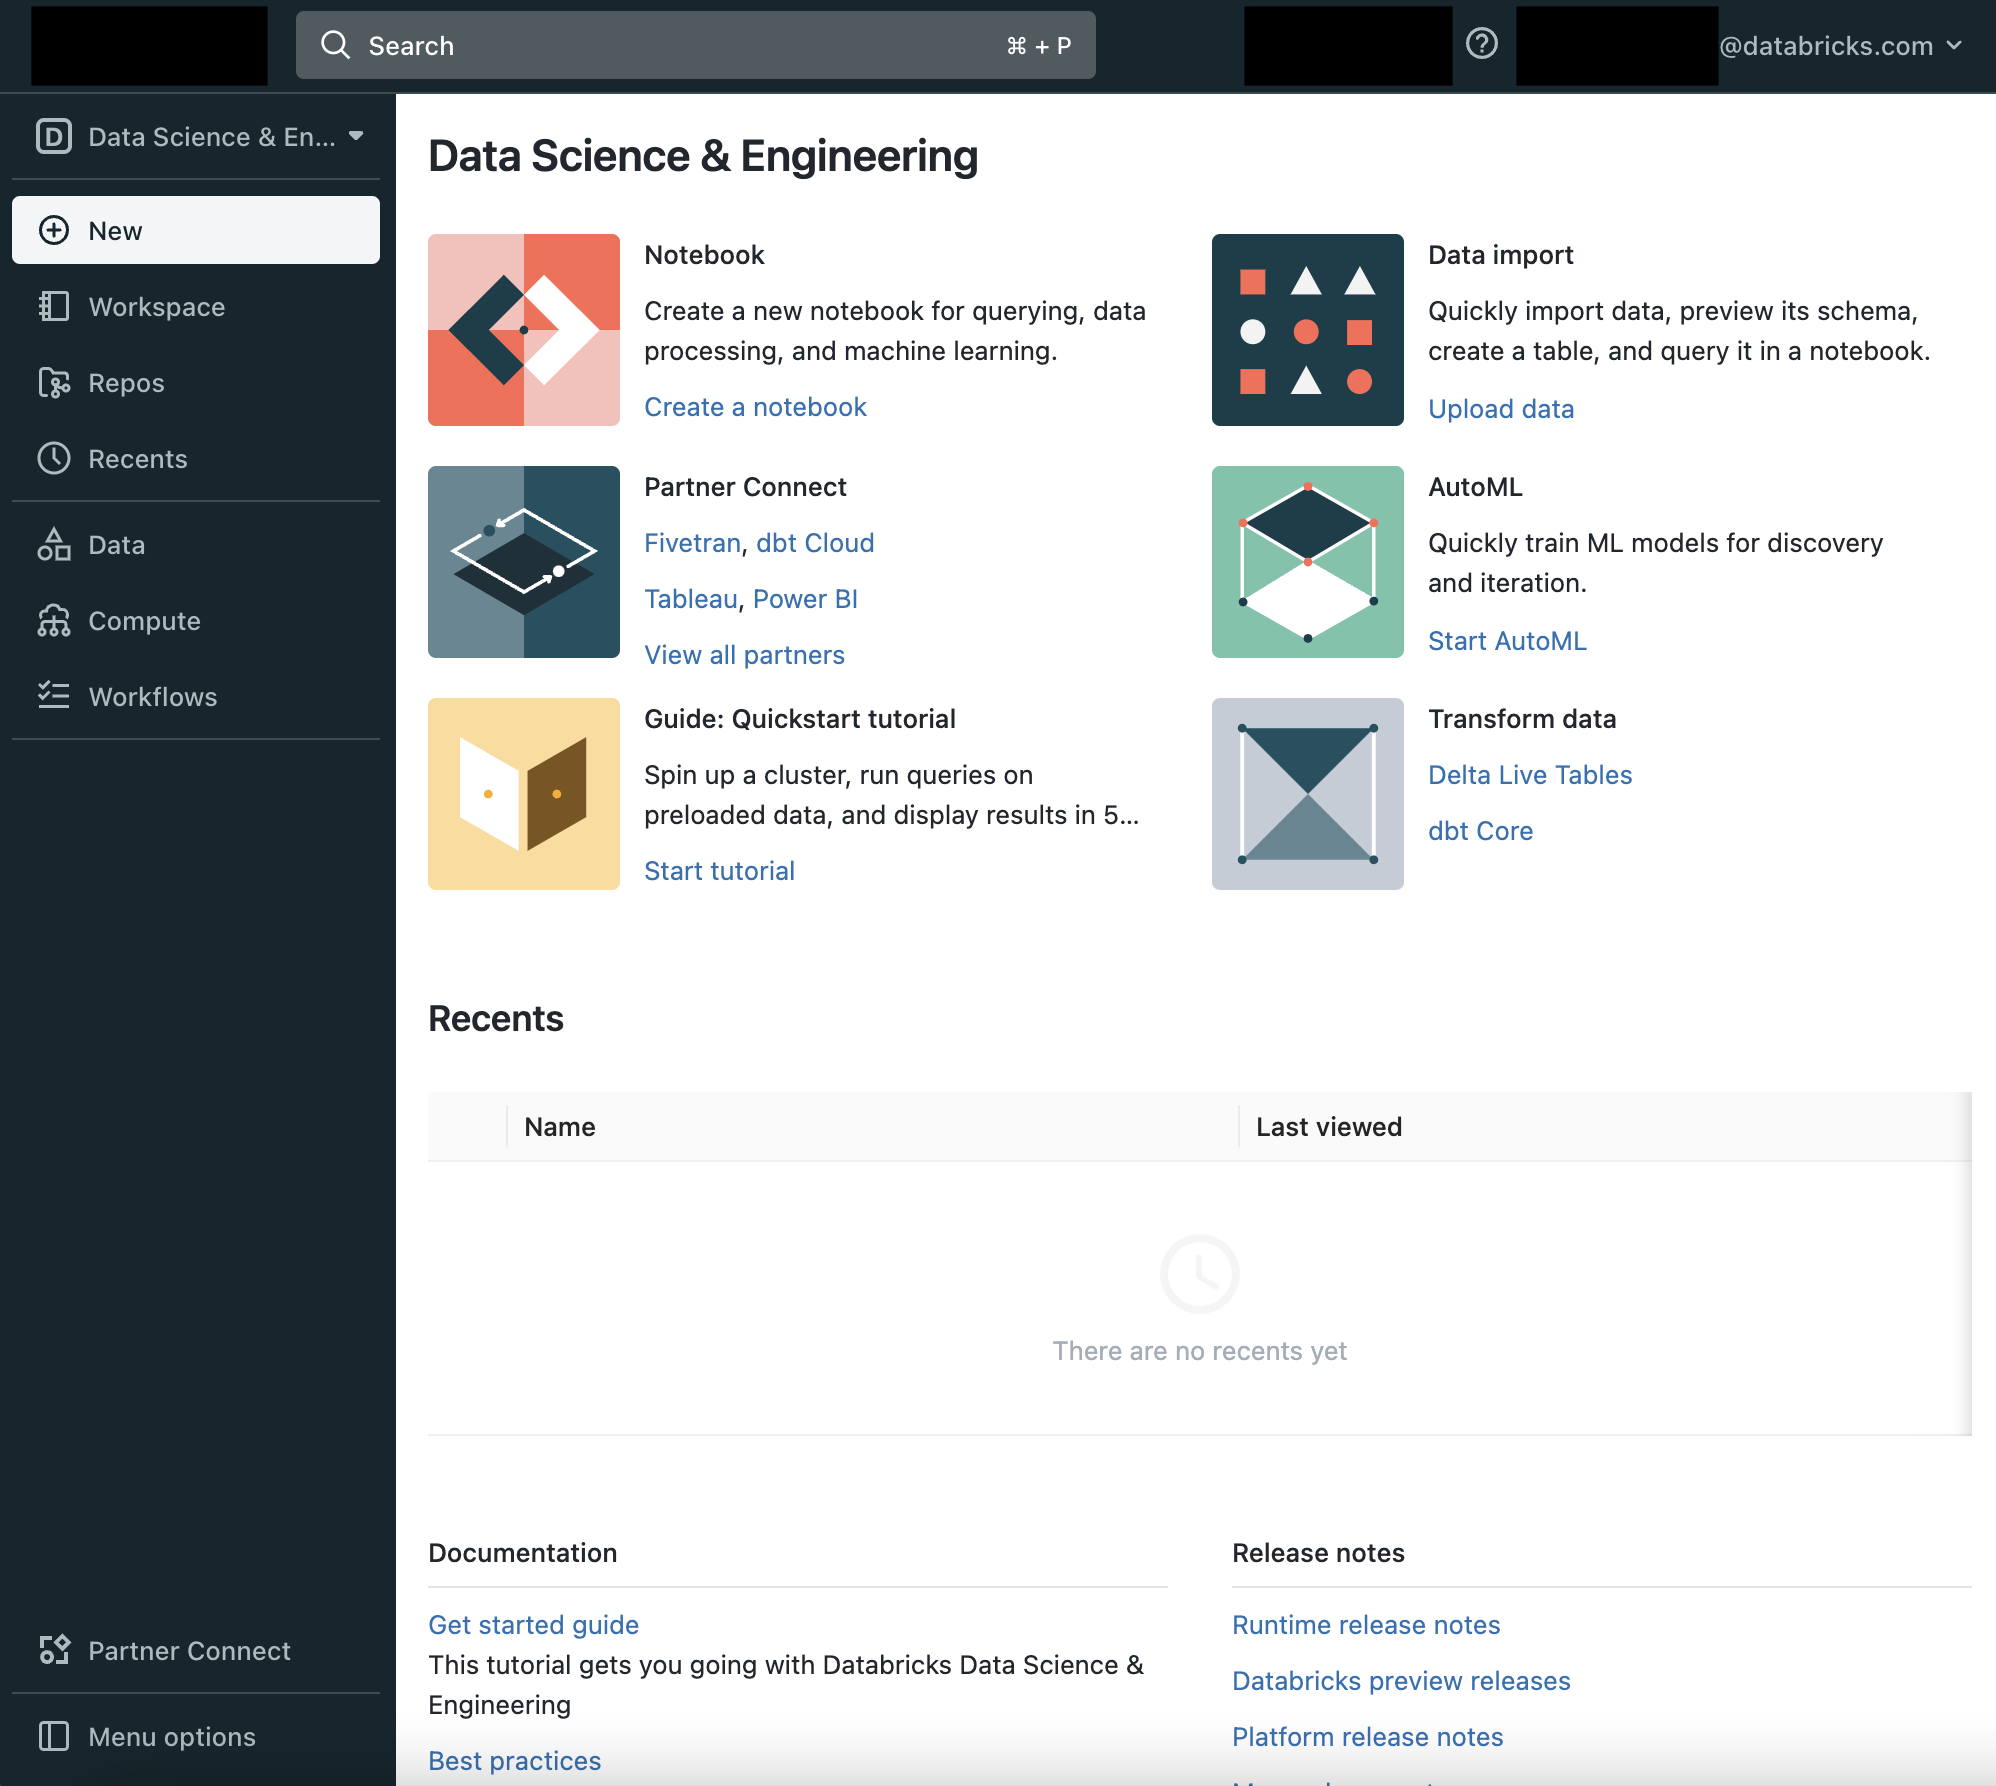


##Databricks Runtime

Databricks Runtime is an optimized version of Apache Spark that includes additional libraries and tools to enhance performance and productivity. It includes pre-installed libraries for machine learning, data visualization, and data processing, as well as tools for debugging and monitoring Spark jobs.

Based on the [picture](https://www.databricks.com/kr/glossary/what-is-databricks-runtime) below you can compare Spark on Databricks with one in other cloud providers, outside of Databricks.


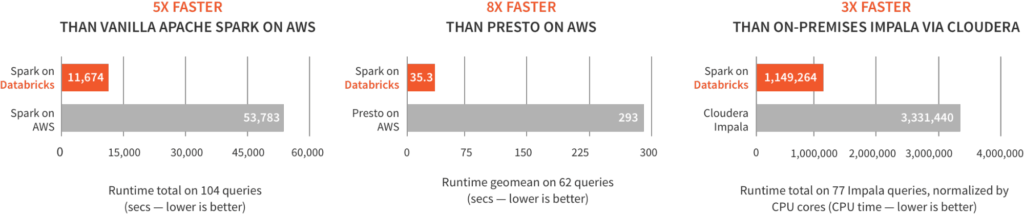

##Databricks Connect

Databricks Connect is a tool that allows users to connect their **local** development environment to a Databricks **cluster**. It enables users to write code in their preferred development environment and execute it on a Databricks cluster, providing a **seamless** development experience - check the structure below ([source](https://menziess.github.io/howto/install/databricks-connect/)).

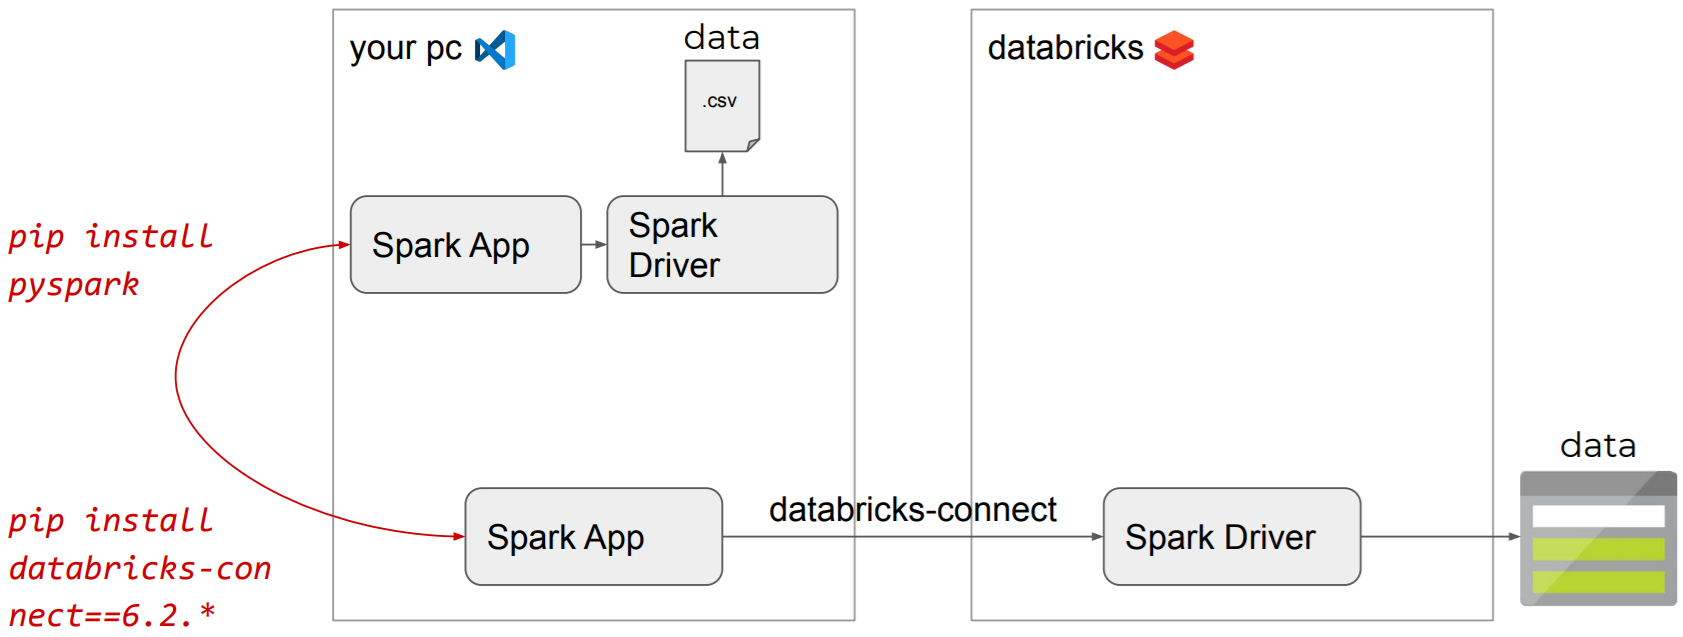


##MLflow

MLflow is an open-source platform for **managing machine learning workflows**. It provides tools for tracking experiments, packaging code into reproducible runs, and sharing and deploying models. MLflow integrates with Databricks Workspace and Databricks Runtime, enabling users to track and manage their machine learning experiments.

The MLflow descriptive picture [source](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.infoq.com%2Fpresentations%2Fmlflow-databricks%2F&psig=AOvVaw2zJQBvckN6H1g3NU3qsvbW&ust=1678443030057000&source=images&cd=vfe&ved=0CBEQjhxqFwoTCJCmidfNzv0CFQAAAAAdAAAAABAD):

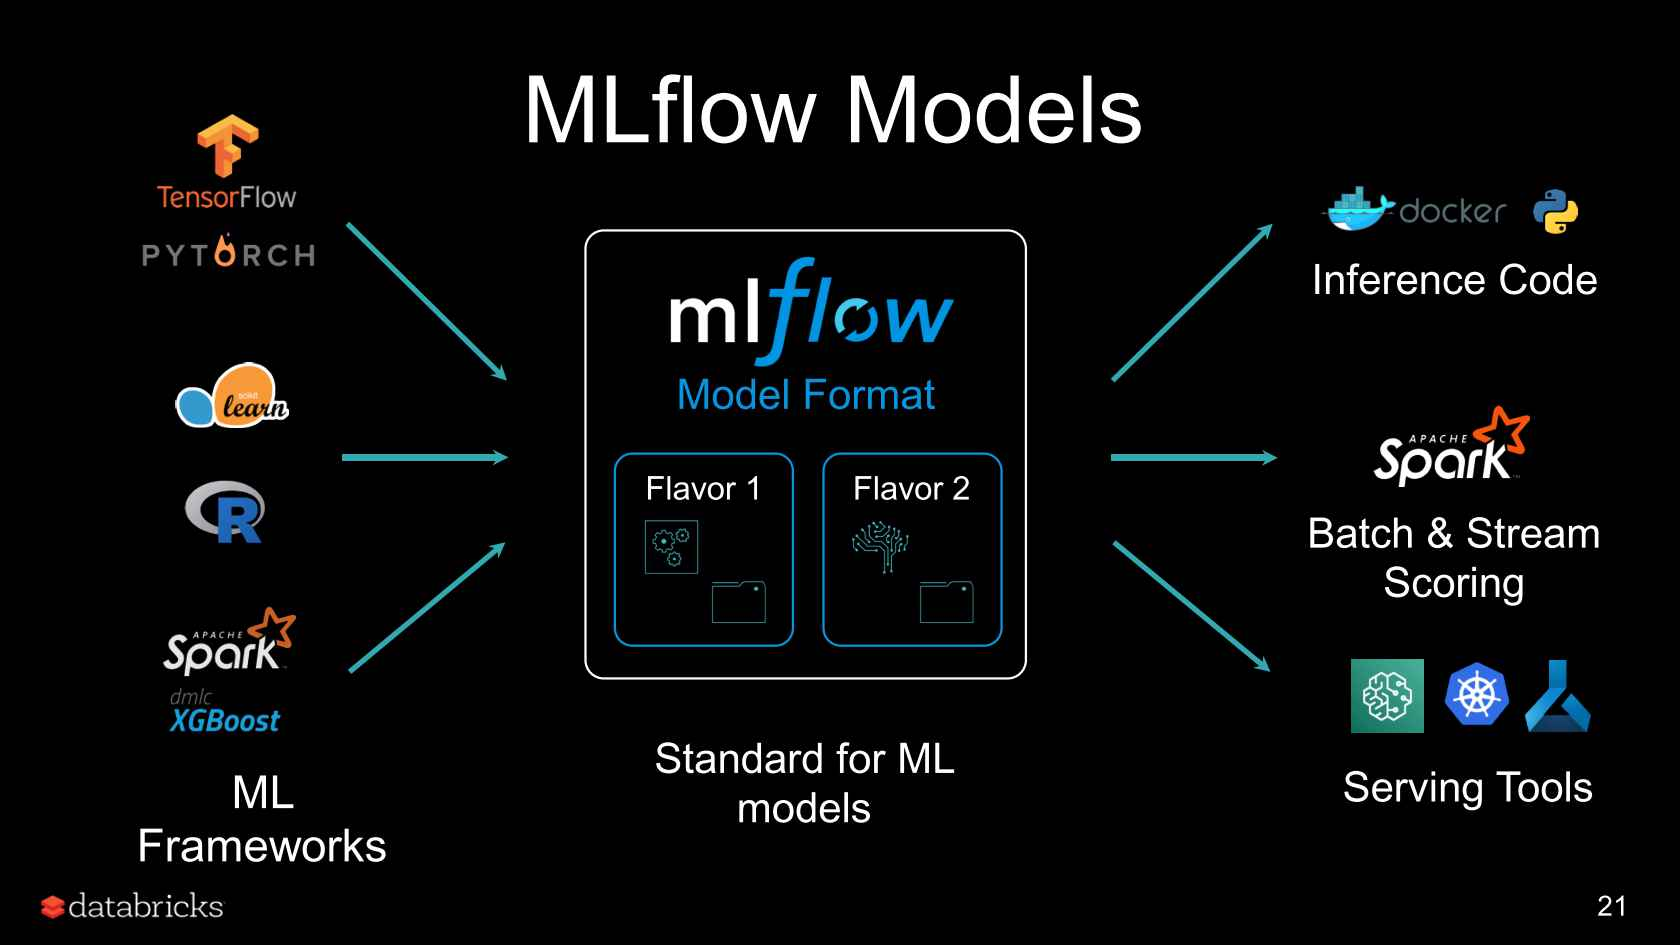

##Databricks Jobs

Databricks Jobs is a scheduling tool that enables users to automate their Spark jobs. It provides a user-friendly interface for scheduling jobs, managing dependencies, and monitoring job progress. Jobs can be triggered by events, such as the arrival of new data, or run on a regular schedule.

[Databricks Cluster Manager and Jobs](https://www.youtube.com/watch?v=R-lZxbgw81Y) example schema below:


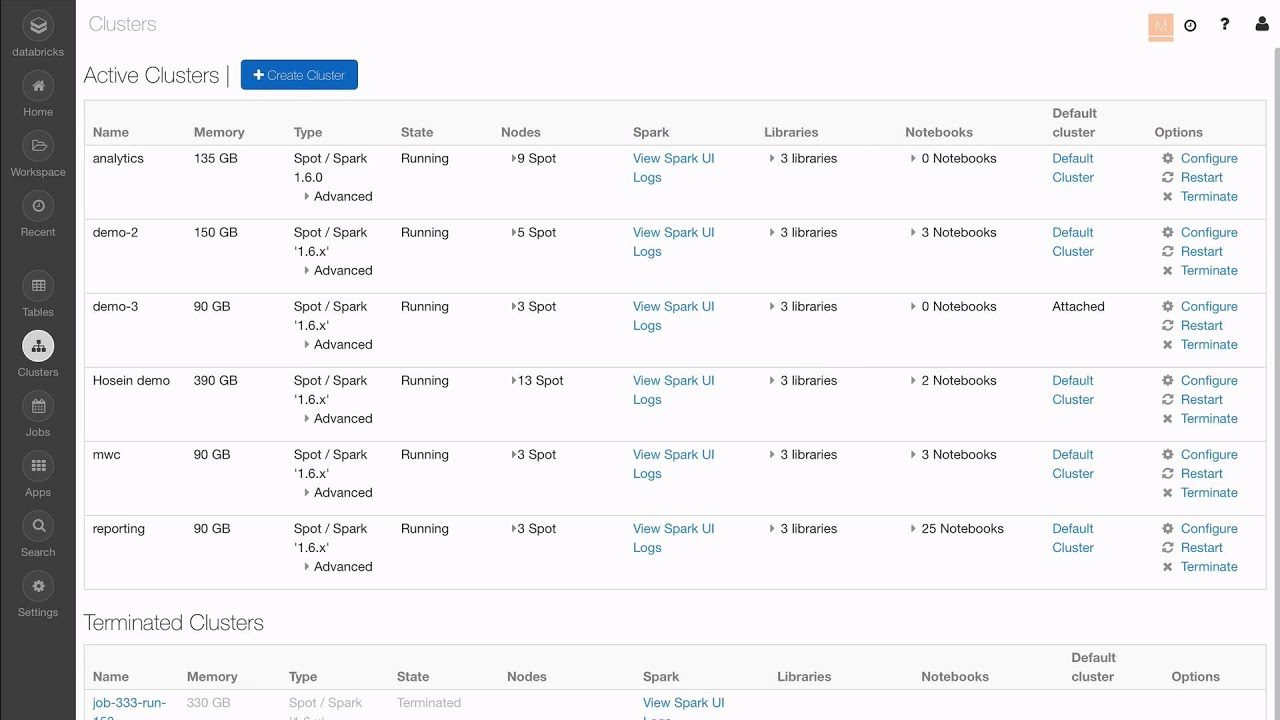

##Databricks Delta Lake

Databricks Delta is a data management system that provides transactional capabilities and data versioning on top of Apache Spark. It enables data engineers and data scientists to manage large datasets and ensure data consistency and integrity. Delta supports ACID transactions, automatic data indexing, and data versioning.

Please take a look at the architecture schema  [source](https://techcommunity.microsoft.com/t5/analytics-on-azure-blog/easier-data-model-management-for-power-bi-using-delta-live/ba-p/3500698) below, where the Delta Lake concept is depicted in details:

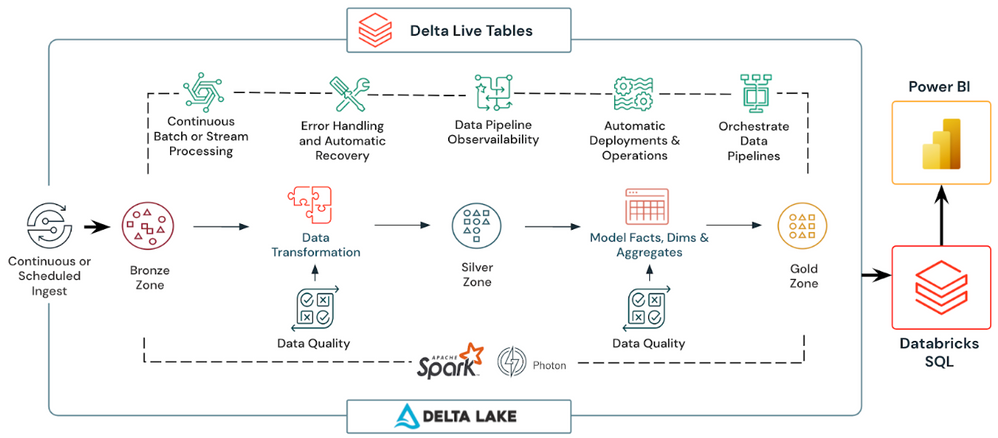


Delta Lake consists of several important layers which all act to serve data better from the beginning to an end. 

1. **Storage layer:** Delta Lake is built on top of a storage layer that can be any data storage system that supports the Hadoop Distributed File System (**HDFS**) API or the Amazon S3 API. This includes traditional file systems, object stores, and cloud storage services. Delta Lake stores data in Parquet format, which is a columnar storage format that is optimized for performance and compression.

2. **Transaction log:** Delta Lake uses a transaction log to keep track of changes to the data. Every change to the data is recorded in the transaction log as a Delta transaction. A Delta transaction is a unit of work that can include multiple insert, update, and delete operations. The transaction log is stored alongside the data and can be used to recover the data in the event of a failure.

3. **ACID transactions:** Delta Lake supports **ACID (Atomicity, Consistency, Isolation, Durability)** transactions, which ensure that changes to the data are atomic, consistent, isolated, and durable. ACID transactions are used to ensure that changes to the data are recorded in the transaction log and can be rolled back in the event of a failure.

5. **Data versioning:** Delta Lake provides data versioning, which enables users to query and revert to previous versions of the data. Each version of the data is stored as a snapshot of the data, along with a corresponding version number. Users can query the data as of a specific version or compare different versions of the data.

6. **Automatic data indexing:** Delta Lake provides automatic data indexing, which improves query performance by creating indexes on the data. Delta Lake automatically creates indexes on columns that are frequently used in queries, such as the primary key. Indexes are stored alongside the data and can be used to speed up queries.

7. **Delta tables:** Delta Lake provides a higher-level abstraction called Delta tables, which make it easy to manage and query data. A Delta table is a directory of data files that is managed by Delta Lake. Delta tables can be created, deleted, and modified using SQL or the Delta Lake API.

Overall, the Databricks ecosystem provides a comprehensive platform for data analytics and machine learning. It enables data scientists and analysts to collaborate, manage their projects, and process and analyze large volumes of data efficiently. The components of the ecosystem work together seamlessly, providing a cohesive experience for users.

In the section below let's explore some features of Delta Lake in practise with exemplary code chunks.


###Creating a Delta table in Databricks:

In [ ]:

from delta import DeltaTable

# create a DataFrame
data = spark.range(0, 5)

# write data to a Delta table
data.write.format("delta").save("/tmp/delta-table")


###Reading data from a Delta table:

In [ ]:
from delta import DeltaTable

# read data from a Delta table
data = DeltaTable.forPath(spark, "/tmp/delta-table").toDF()


###Writing data to a Delta table:

In [ ]:
from delta import DeltaTable

# create a DataFrame
data = spark.range(5, 10)

# write data to a Delta table
data.write \
  .format("delta") \
  .mode("overwrite") \
  .option("replaceWhere", "start_date >= '2017-01-01' AND end_date <= '2017-01-31'") \
  .save("/tmp/delta/events")


Delta Lake supports streaming data ingestion, which allows you to process and analyze real-time data as it becomes available. 

###Here's an example of how to stream data into Delta Lake using Apache Kafka:

In [ ]:
from pyspark.sql.functions import from_json, col
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

# Define the schema of the incoming data
schema = StructType([
  StructField("id", IntegerType()),
  StructField("value", StringType())
])

# Read data from Kafka
raw_data = spark.readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", "localhost:9092") \
    .option("subscribe", "input_topic") \
    .load() \
    .selectExpr("CAST(value AS STRING)")

# Parse the incoming JSON data
parsed_data = raw_data.select(from_json("value", schema).alias("data")).select("data.*")

# Write the parsed data to Delta Lake
parsed_data.writeStream \
    .format("delta") \
    .option("checkpointLocation", "/tmp/checkpoints") \
    .table("delta_table")


This code reads data from a Kafka topic called input_topic, parses the incoming JSON data using the specified schema, and then writes the parsed data to a Delta Lake table called delta_table. The checkpointLocation option specifies the location where the streaming job checkpoints will be stored.

Delta Lake Partitioning
Delta Lake supports partitioning, which allows you to divide large datasets into smaller, more manageable parts. 

###Here's an example of how to partition a Delta Lake table:

In [ ]:
# Create a Delta Lake table
data = spark.range(1000000).withColumn("value", col("id") % 100)

data.write.format("delta").save("/tmp/delta-table")

# Partition the table by the 'value' column
(spark.read.format("delta").load("/tmp/delta-table")
  .write.format("delta").partitionBy("value")
  .save("/tmp/partitioned-delta-table"))


This code creates a Delta Lake table containing one million rows and a value column, and then partitions the table by the value column. The resulting table is stored in the /tmp/partitioned-delta-table directory.

Delta Lake Optimization
Delta Lake provides several optimization techniques to improve query performance and reduce storage costs. Here's an example of how to use Delta Lake optimization techniques:

In [ ]:
# Optimize the Delta Lake table
spark.sql("OPTIMIZE delta.`/tmp/delta-table`")

# Vacuum the Delta Lake table
spark.sql("VACUUM delta.`/tmp/delta-table`")


This code optimizes a Delta Lake table located at /tmp/delta-table by compacting small files and removing files that are no longer needed. The OPTIMIZE and VACUUM commands can help reduce storage costs and improve query performance.

Delta Lake Time Travel
Delta Lake provides time travel capabilities, which allow you to query and analyze historical data. 

###Here's an example of how to use Delta Lake time travel:

In [ ]:
# Create a Delta Lake table
data = spark.range(10).withColumn("value", col("id") % 2)

data.write.format("delta").save("/tmp/delta-table")

# Update the table
data = spark.range(10, 20).withColumn("value", col("id") % 3)

data.write.format("delta").mode("overwrite").save("/tmp/delta-table")

# Query the table using time travel
version_0 = spark.read.format("delta").option("versionAsOf", 0).load("/tmp/delta-table")
version_1 = spark.read.format("delta").option("versionAsOf", 1).load("/tmp/delta-table")
version_latest = spark.read.format("delta").load("/tmp/delta-table")

# Show the results
version_0.show()
version_1.show()
version_latest.show()


This code creates a Delta Lake table containing ten rows and a value column, updates the table with ten new rows and a different value column, and then queries the table using time travel. The ```versionAsOf``` option specifies the version of the table to query.

Delta Lake Merge
Delta Lake provides a powerful merge operation, which allows you to combine two Delta Lake tables based on a set of merge conditions. 

###Here's an example of how to use Delta Lake merge:

In [ ]:
# Create two Delta Lake tables
data_1 = spark.range(10).withColumn("value", col("id") % 2)
data_2 = spark.range(5, 15).withColumn("value", col("id") % 3)

data_1.write.format("delta").save("/tmp/delta-table-1")
data_2.write.format("delta").save("/tmp/delta-table-2")

# Merge the tables based on the 'id' column
deltaTable = DeltaTable.forPath(spark, "/tmp/delta-table-1")

deltaTable.alias("old_data") \
    .merge(data_2.alias("new_data"), "id") \
    .whenMatchedUpdate(set={"value": "new_data.value"}) \
    .whenNotMatchedInsert(values={"id": "new_data.id", "value": "new_data.value"}) \
    .execute()

# Show the results
deltaTable.toDF().show()


This code creates two Delta Lake tables containing ten rows each and a value column, merges the tables based on the id column, and then displays the merged table. The merge operation can help you combine datasets from different sources and keep your data up-to-date.



##I hope the information which was provided above made you a little closer to understanding of the fascinating world of Databricks 😃